# Import Libariaries 

In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn provides a nice set of color palettes
from scipy.stats import linregress

# Convert Excel file into CSV and import CVS file

In [3]:
pd.read_excel("Data_Train - Copy.xlsx").to_csv("Data_Practice.csv", index=False)

In [4]:
df = pd.read_csv("Data_Practice.csv")

In [5]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
df1 = pd.read_csv("Clean_Dataset.csv")

In [7]:
df1.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [8]:
df1["Number of Passangers"] = ""

In [9]:
df1.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Number of Passangers
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,


# Perform Statistics 

In [10]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
average = df["Price"].mean()
average

9087.064120565385

In [12]:
print(df.shape)


(10683, 11)


In [13]:
df.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

# Check Null values and remove null values

In [14]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [15]:
df = df.dropna(axis = 0, how = "any")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [16]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Replace values name in the rows

In [17]:
df1 = df["Destination"].replace({'New Delhi':'Delhi','Delhi':'Delhi'})
df1

0           Delhi
1        Banglore
2          Cochin
3        Banglore
4           Delhi
           ...   
10678    Banglore
10679    Banglore
10680       Delhi
10681       Delhi
10682      Cochin
Name: Destination, Length: 10682, dtype: object

In [18]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Perform Binning

In [19]:
Bins = [0, 1000, 3000, 5000, 7000, 9000, 11000, 13000, 15000]
labels = ["Class A","Class B","Class C","Class D","Class E","Class F","Class G","Class H"]

df['Category'] = pd.cut(df['Price'],Bins, labels = labels)
df['Category']

C:\Users\suraj\AppData\Local\Temp\ipykernel_11992\3030165197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = pd.cut(df['Price'],Bins, labels = labels)


0        Class C
1        Class E
2        Class H
3        Class D
4        Class H
          ...   
10678    Class C
10679    Class C
10680    Class E
10681    Class G
10682    Class G
Name: Category, Length: 10682, dtype: category
Categories (8, object): ['Class A' < 'Class B' < 'Class C' < 'Class D' < 'Class E' < 'Class F' < 'Class G' < 'Class H']

In [20]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Category
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Class C
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Class E
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Class H
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Class D
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Class H


# Use Groupby Function

In [21]:
df.groupby(["Price", "Airline"]).mean()

C:\Users\suraj\AppData\Local\Temp\ipykernel_11992\1895395268.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Price", "Airline"]).mean()


,
Price,Airline
1759,SpiceJet
1840,Jet Airways
1965,SpiceJet
2017,SpiceJet
2050,Air India
...,...
52285,Jet Airways Business
54826,Jet Airways
57209,Jet Airways Business


In [22]:
df.groupby(["Source", "Destination"]).mean()

C:\Users\suraj\AppData\Local\Temp\ipykernel_11992\211726138.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Source", "Destination"]).mean()


Price
Source   Destination              
Banglore Delhi         5143.918577
         New Delhi    11917.716738
Chennai  Kolkata       4789.892388
Delhi    Cochin       10540.113536
Kolkata  Banglore      9158.389411
Mumbai   Hyderabad     5059.708752

 # Use Mapping // Change the format of the data type

In [23]:
df.dtypes

Airline              object
Date_of_Journey      object
Source               object
Destination          object
Route                object
Dep_Time             object
Arrival_Time         object
Duration             object
Total_Stops          object
Additional_Info      object
Price                 int64
Category           category
dtype: object

In [24]:
df['Price'].map("${:}".format)

0         $3897
1         $7662
2        $13882
3         $6218
4        $13302
          ...  
10678     $4107
10679     $4145
10680     $7229
10681    $12648
10682    $11753
Name: Price, Length: 10682, dtype: object

In [25]:
df.dtypes

Airline              object
Date_of_Journey      object
Source               object
Destination          object
Route                object
Dep_Time             object
Arrival_Time         object
Duration             object
Total_Stops          object
Additional_Info      object
Price                 int64
Category           category
dtype: object

# Visulaizations

In [28]:
airline_df = df.groupby('Airline')
airline_avg = airline_df['Airline'].count()
airline_avg

Airline
Air Asia                              319
Air India                            1751
GoAir                                 194
IndiGo                               2053
Jet Airways                          3849
Jet Airways Business                    6
Multiple carriers                    1196
Multiple carriers Premium economy      13
SpiceJet                              818
Trujet                                  1
Vistara                               479
Vistara Premium economy                 3
Name: Airline, dtype: int64

<IPython.core.display.Javascript object>


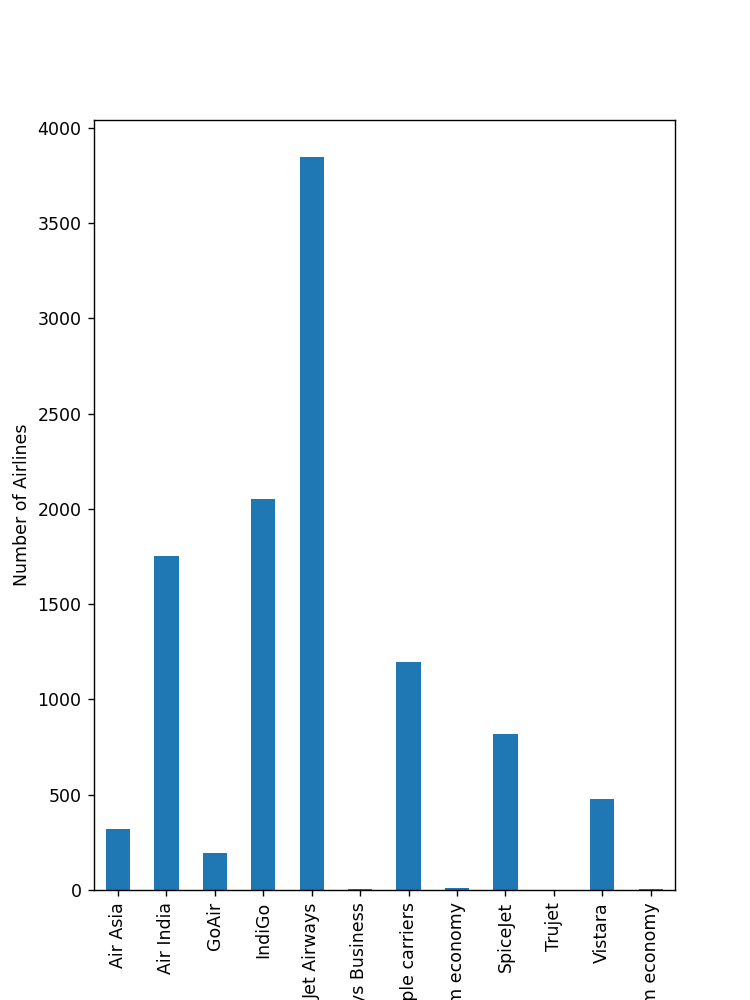

In [33]:
df_chart = airline_avg.plot(kind='bar', figsize=(6,8))
df_chart.set_xlabel("Airlines Name")
df_chart.set_ylabel("Number of Airlines")
plt.show()

In [30]:
df.groupby('Source')['Destination'].count().plot(kind="bar", title="Source and Destination")

<Axes: title={'center': 'Source and Destination'}, xlabel='Source', ylabel='Number of Airlines'>

In [32]:
x_axis = np.arange(len(df))
x_axis

array([    0,     1,     2, ..., 10679, 10680, 10681])

In [34]:
new_df = df[["Airline","Price"]]
new_df

,Airline,Price
0,IndiGo,3897
1,Air India,7662
2,Jet Airways,13882
3,IndiGo,6218
4,IndiGo,13302
...,...,...
10678,Air Asia,4107
10679,Air India,4145
10680,Jet Airways,7229
10681,Vistara,12648


In [35]:
new_df = new_df.set_index("Airline")
new_df

,Price
Airline,
IndiGo,3897
Air India,7662
Jet Airways,13882
IndiGo,6218
IndiGo,13302
...,...
Air Asia,4107
Air India,4145
Jet Airways,7229


<IPython.core.display.Javascript object>


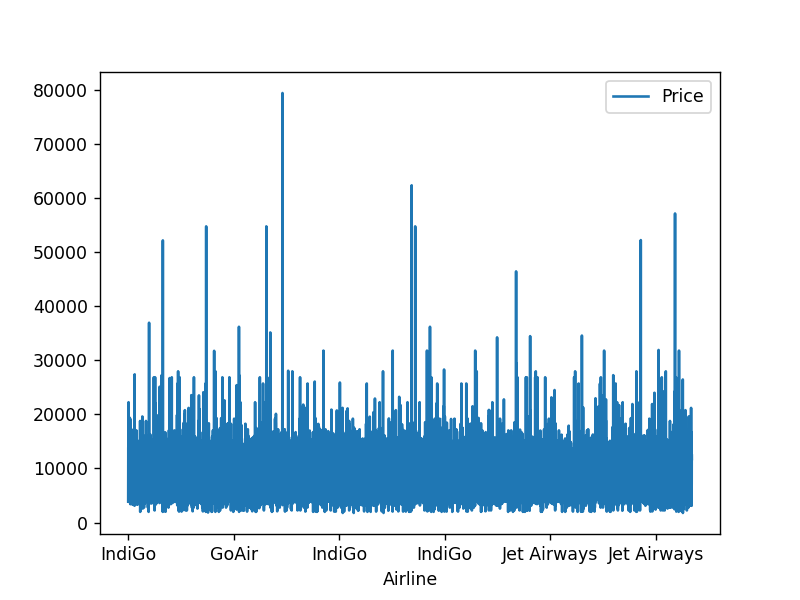

<Axes: xlabel='Airline'>

In [43]:
new_df.plot()